# Cross validation


In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import  metrics

Rozważmy następujący zbiór punktów:

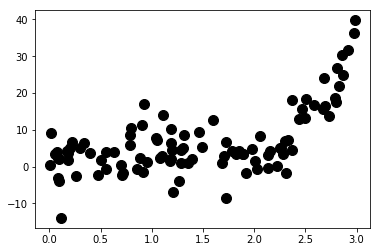

In [4]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,5).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Zadanie
Podziel zbiór danych na część testową i treningową. 
Naucz model na części treningowej i ocen wyniki na części testowej.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

((60,), (60,))
((40,), (40,))


In [6]:
X_train=np.vstack(X_train)
X_test=np.vstack(X_test)

In [7]:
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)

/usr/local/lib/python2.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


array([16.7863012 ,  7.83496263,  1.52499081, 21.72512461,  5.22309233,
        1.21616506,  2.34438567,  1.05427377,  1.16721083, 18.11533869,
        2.92402321,  2.12491152,  4.89059135,  3.70325523, 21.48971362,
        9.69840513,  5.43085638,  2.32393769, 15.8910652 ,  5.3030355 ,
        3.67981527,  1.18459884,  0.99087394,  3.53371205, 12.90092008,
        5.09172562, 20.38173427,  1.39795297,  1.94028855,  5.90484338,
        1.44730898,  5.10178936, 15.74910502,  8.99617516, 18.33988065,
       10.04569615,  1.35385667,  1.63283164, 14.25504447, 16.07645553])

In [8]:
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))

Explained variance score: 0.617053753082
Explained variance score: 0.617053753082
Median absolute error: 4.10127669947
Mean squared error: 45.3907417884
Mean absolute errors: 5.27360697104


# Zadanie
Wylicz powyższe miary dla wszytkich modeli:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

In [9]:
model25 = make_pipeline(PolynomialFeatures(25), linear_model.LinearRegression())
model25.fit(X_train, y_train)
model25.predict(X_test)

array([ 4.70478797e+01,  3.70364137e+00,  1.66560371e+00, -9.99209860e+03,
       -6.39407845e+00,  3.38847300e+00,  4.76413526e-01,  4.22681113e+00,
        4.80055284e+00,  1.66084265e+01,  7.12894933e-01, -1.10312010e-01,
        1.45620532e+00,  7.74657333e+00, -6.66955173e+03,  4.14382692e+00,
       -4.71844230e+00, -1.01655907e-01,  5.52314734e+01, -6.01360576e+00,
        1.39932914e+00,  3.55743140e+00,  4.65843944e+00,  1.35200901e+00,
        1.82419714e+01, -6.41055126e+00, -6.03122042e+02,  2.11360098e+00,
       -1.38346378e+00,  9.84947705e+00,  2.08547013e+00, -6.43328940e+00,
        5.45156531e+01,  3.06612916e+00,  1.69717078e+01,  5.22244020e+00,
        2.64205050e+00, -2.41090780e-01,  3.25366492e+01,  5.54072547e+01])

In [10]:
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model25.predict(X_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model25.predict(X_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model25.predict(X_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model25.predict(X_test)) ))

Explained variance score: -30232.9816662
Median absolute error: 6.13669775116
Mean squared error: 3650423.37129
Mean absolute errors: 442.551152248
